In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import matplotlib.dates as mdates
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./Resource/US_youtube_trending_data.csv")
display(df.head())
df.tail()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
267982,ahx0iw78lUE,Showing Jack my memes,2024-03-31T17:32:47Z,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,24,2024-04-11T00:00:00Z,pewdiepie|pewds|pewdie|jack|pewdiepie jacksept...,2333425,161250,0,4128,https://i.ytimg.com/vi/ahx0iw78lUE/default.jpg,False,False,🌏 Get exclusive NordVPN deal here ➵ https://No...
267983,-Pcout3o4Fg,LeBron James Opens Up About The Miami Heat Lea...,2024-04-02T19:30:00Z,UC6L_LBqoKZXFa4WxHox5iCw,Mind the Game Pod w/ LeBron James and JJ Redick,22,2024-04-11T00:00:00Z,lebron james|jj redick|lebron james jj redick|...,691381,19514,0,2366,https://i.ytimg.com/vi/-Pcout3o4Fg/default.jpg,False,False,"In this preview clip for Episode 3, LeBron Jam..."
267984,-MdZRXipEHg,Reunited With Our Daughter After 3 Months! *EM...,2024-04-03T18:14:27Z,UCSxspw1FZ3K4bhdHhhibhqw,Dad V Girls,24,2024-04-11T00:00:00Z,Dad V Girls|Dad|Girls|Dad Vs Girls|Family|Fami...,584315,17181,0,667,https://i.ytimg.com/vi/-MdZRXipEHg/default.jpg,False,False,👉 Join the DVG Fam: https://bit.ly/2lf0X8J📸 D...
267985,njnpzWbhpK8,Poison (Official Remix) | Hazbin Hotel | Prime...,2024-04-01T05:23:29Z,UCzfyYtgvkx5mLy8nlLlayYg,Vivziepop,1,2024-04-11T00:00:00Z,Vivziepop|Zoophobia,1500159,145948,0,10538,https://i.ytimg.com/vi/njnpzWbhpK8/default.jpg,False,False,"Get a taste of poison…Performed by Roman, orig..."
267986,u5P0n2t9RNA,Triple H Goes Sneaker Shopping With Complex,2024-04-01T14:00:39Z,UCE_--R1P5-kfBzHTca0dsnw,Complex,24,2024-04-11T00:00:00Z,Triple H|WWE|wwe raw|wrestlemania 40|roman rei...,1212337,41642,0,2912,https://i.ytimg.com/vi/u5P0n2t9RNA/default.jpg,False,False,WWE Legend Triple H goes Sneaker Shopping with...


In [4]:
df.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description'],
      dtype='object')

In [5]:
df['view_count'].sort_values(ascending= False)

266187    1407643634
266388    1406329649
265987     628718636
152788     277791741
152568     273162966
             ...    
49597              0
126641             0
126404             0
200521             0
20184              0
Name: view_count, Length: 267987, dtype: int64

In [6]:
#Views and Likes and title 
#Views/Dislikes
#Category ID and Views/Likes/Dislikes/Comment Count
#Publish Time and Views/Comment Count

In [7]:
df['likes'].sort_values(ascending= False)

56374     16021534
3358      15735533
3137      15460822
2894      15246496
2653      14994034
            ...   
28118            0
217710           0
217735           0
107828           0
177394           0
Name: likes, Length: 267987, dtype: int64

In [8]:
top_10_most_viewed = df.sort_values(by='view_count', ascending=False).head(10)
top_10_most_viewed 

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
266187,cc2-4ci4G84,Discord Loot Boxes are here.,2024-04-01T17:46:17Z,UCZ5XnGb-3t7jCkXdawN2tkA,Discord,24,2024-04-03T00:00:00Z,[None],1407643634,126926,0,13987,https://i.ytimg.com/vi/cc2-4ci4G84/default.jpg,False,False,Why would we ever bring Loot Boxes into a chat...
266388,cc2-4ci4G84,Discord Loot Boxes are here.,2024-04-01T17:46:17Z,UCZ5XnGb-3t7jCkXdawN2tkA,Discord,24,2024-04-04T00:00:00Z,[None],1406329649,165173,0,17446,https://i.ytimg.com/vi/cc2-4ci4G84/default.jpg,False,False,Why would we ever bring Loot Boxes into a chat...
265987,cc2-4ci4G84,Discord Loot Boxes are here.,2024-04-01T17:46:17Z,UCZ5XnGb-3t7jCkXdawN2tkA,Discord,24,2024-04-02T00:00:00Z,[None],628718636,47460,0,4829,https://i.ytimg.com/vi/cc2-4ci4G84/default.jpg,False,False,Why would we ever bring Loot Boxes into a chat...
152788,gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,2022-08-19T04:00:13Z,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,10,2022-09-10T00:00:00Z,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,277791741,12993894,0,3534337,https://i.ytimg.com/vi/gQlMMD8auMs/default.jpg,False,False,BLACKPINK - ‘Pink Venom’ M/VKick in the door W...
152568,gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,2022-08-19T04:00:13Z,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,10,2022-09-09T00:00:00Z,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,273162966,12937252,0,3516745,https://i.ytimg.com/vi/gQlMMD8auMs/default.jpg,False,False,BLACKPINK - ‘Pink Venom’ M/VKick in the door W...
152365,gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,2022-08-19T04:00:13Z,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,10,2022-09-08T00:00:00Z,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,268758295,12882841,0,3504692,https://i.ytimg.com/vi/gQlMMD8auMs/default.jpg,False,False,BLACKPINK - ‘Pink Venom’ M/VKick in the door W...
152175,gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,2022-08-19T04:00:13Z,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,10,2022-09-07T00:00:00Z,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,264459017,12829059,0,3491132,https://i.ytimg.com/vi/gQlMMD8auMs/default.jpg,False,False,BLACKPINK - ‘Pink Venom’ M/VKick in the door W...
56374,WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,2021-05-21T03:46:13Z,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,10,2021-05-30T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,264407389,16021534,150989,6738537,https://i.ytimg.com/vi/WMweEpGlu_U/default.jpg,False,False,BTS (방탄소년단) 'Butter' Official MV Credits: Dire...
151968,gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,2022-08-19T04:00:13Z,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,10,2022-09-06T00:00:00Z,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,260126694,12773474,0,3479717,https://i.ytimg.com/vi/gQlMMD8auMs/default.jpg,False,False,BLACKPINK - ‘Pink Venom’ M/VKick in the door W...
151773,gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,2022-08-19T04:00:13Z,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,10,2022-09-05T00:00:00Z,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,255524865,12715882,0,3466961,https://i.ytimg.com/vi/gQlMMD8auMs/default.jpg,False,False,BLACKPINK - ‘Pink Venom’ M/VKick in the door W...


In [9]:
top_10_most_liked = df.sort_values(by='likes', ascending=False).head(10)
top_10_most_liked

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
56374,WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,2021-05-21T03:46:13Z,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,10,2021-05-30T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,264407389,16021534,150989,6738537,https://i.ytimg.com/vi/WMweEpGlu_U/default.jpg,False,False,BTS (방탄소년단) 'Butter' Official MV Credits: Dire...
3358,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,10,2020-08-28T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,232649205,15735533,714194,6065230,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...
3137,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,10,2020-08-27T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,219110491,15460822,674291,5810680,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...
2894,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,10,2020-08-26T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,208581468,15246496,646349,5744496,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...
2653,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,10,2020-08-25T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,200692965,14994034,621578,5623570,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...
2418,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,10,2020-08-24T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,183414472,14678048,576852,5748638,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...
55994,WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,2021-05-21T03:46:13Z,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,10,2021-05-23T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,166895681,14202518,51663,5987770,https://i.ytimg.com/vi/WMweEpGlu_U/default.jpg,False,False,BTS (방탄소년단) 'Butter' Official MV Credits: Dire...
2201,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,10,2020-08-23T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,160510938,14134480,505291,5452026,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...
55791,WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,2021-05-21T03:46:13Z,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,10,2021-05-22T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,133484128,13361198,28528,5594286,https://i.ytimg.com/vi/WMweEpGlu_U/default.jpg,False,False,BTS (방탄소년단) 'Butter' Official MV Credits: Dire...
152788,gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,2022-08-19T04:00:13Z,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,10,2022-09-10T00:00:00Z,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,277791741,12993894,0,3534337,https://i.ytimg.com/vi/gQlMMD8auMs/default.jpg,False,False,BLACKPINK - ‘Pink Venom’ M/VKick in the door W...


In [10]:
df_sorted_view = df.sort_values(by=['view_count'], ascending=[False])
df_sorted_view

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
266187,cc2-4ci4G84,Discord Loot Boxes are here.,2024-04-01T17:46:17Z,UCZ5XnGb-3t7jCkXdawN2tkA,Discord,24,2024-04-03T00:00:00Z,[None],1407643634,126926,0,13987,https://i.ytimg.com/vi/cc2-4ci4G84/default.jpg,False,False,Why would we ever bring Loot Boxes into a chat...
266388,cc2-4ci4G84,Discord Loot Boxes are here.,2024-04-01T17:46:17Z,UCZ5XnGb-3t7jCkXdawN2tkA,Discord,24,2024-04-04T00:00:00Z,[None],1406329649,165173,0,17446,https://i.ytimg.com/vi/cc2-4ci4G84/default.jpg,False,False,Why would we ever bring Loot Boxes into a chat...
265987,cc2-4ci4G84,Discord Loot Boxes are here.,2024-04-01T17:46:17Z,UCZ5XnGb-3t7jCkXdawN2tkA,Discord,24,2024-04-02T00:00:00Z,[None],628718636,47460,0,4829,https://i.ytimg.com/vi/cc2-4ci4G84/default.jpg,False,False,Why would we ever bring Loot Boxes into a chat...
152788,gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,2022-08-19T04:00:13Z,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,10,2022-09-10T00:00:00Z,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,277791741,12993894,0,3534337,https://i.ytimg.com/vi/gQlMMD8auMs/default.jpg,False,False,BLACKPINK - ‘Pink Venom’ M/VKick in the door W...
152568,gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,2022-08-19T04:00:13Z,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,10,2022-09-09T00:00:00Z,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,273162966,12937252,0,3516745,https://i.ytimg.com/vi/gQlMMD8auMs/default.jpg,False,False,BLACKPINK - ‘Pink Venom’ M/VKick in the door W...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49597,69KrkMpvZdg,Celebrating Luther Vandross's 70th Birthday,2021-04-19T15:00:08Z,UCdq61m8s_48EhJ5OM_MCeGw,GoogleDoodles,1,2021-04-21T00:00:00Z,[None],0,0,0,0,https://i.ytimg.com/vi/69KrkMpvZdg/default.jpg,True,True,"Today’s video Doodle, created by Atlanta-based..."
126641,ZoPJVcHYlU0,Celebrating Route 66,2022-04-29T16:46:04Z,UCdq61m8s_48EhJ5OM_MCeGw,GoogleDoodles,1,2022-05-03T00:00:00Z,[None],0,0,0,0,https://i.ytimg.com/vi/ZoPJVcHYlU0/default.jpg,True,True,Today’s video Doodle takes you on the ultimate...
126404,ZoPJVcHYlU0,Celebrating Route 66,2022-04-29T16:46:04Z,UCdq61m8s_48EhJ5OM_MCeGw,GoogleDoodles,1,2022-05-02T00:00:00Z,[None],0,0,0,0,https://i.ytimg.com/vi/ZoPJVcHYlU0/default.jpg,True,True,Today’s video Doodle takes you on the ultimate...
200521,LHCTW4pckDo,Live at the Met Gala With Vogue,2023-05-02T01:36:13Z,UCRXiA3h1no_PFkb1JCP0yMA,Vogue,26,2023-05-07T00:00:00Z,vogue|met gala|emma chamberlain|metgala23-live...,0,96043,0,1856,https://i.ytimg.com/vi/LHCTW4pckDo/default.jpg,False,False,"For the third year in a row, Vogue will be hos..."


In [11]:
unique_videos_view = df_sorted_view.drop_duplicates(subset='title', keep='first')

unique_videos_view

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
266187,cc2-4ci4G84,Discord Loot Boxes are here.,2024-04-01T17:46:17Z,UCZ5XnGb-3t7jCkXdawN2tkA,Discord,24,2024-04-03T00:00:00Z,[None],1407643634,126926,0,13987,https://i.ytimg.com/vi/cc2-4ci4G84/default.jpg,False,False,Why would we ever bring Loot Boxes into a chat...
152788,gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,2022-08-19T04:00:13Z,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,10,2022-09-10T00:00:00Z,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,277791741,12993894,0,3534337,https://i.ytimg.com/vi/gQlMMD8auMs/default.jpg,False,False,BLACKPINK - ‘Pink Venom’ M/VKick in the door W...
56374,WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,2021-05-21T03:46:13Z,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,10,2021-05-30T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,264407389,16021534,150989,6738537,https://i.ytimg.com/vi/WMweEpGlu_U/default.jpg,False,False,BTS (방탄소년단) 'Butter' Official MV Credits: Dire...
3358,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,10,2020-08-28T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,232649205,15735533,714194,6065230,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...
73564,hdmx71UjBXs,Turn into orbeez - Tutorial #Shorts,2021-07-03T04:04:57Z,UCt8z2S30Wl-GQEluFVM8NUw,FFUNTV,24,2021-08-08T00:00:00Z,[None],206202284,6840430,240769,2826,https://i.ytimg.com/vi/hdmx71UjBXs/default.jpg,False,False,Turn into orbeez - Tutorial #ShortsHey guys! W...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126865,ZoPJVcHYlU0,Celebrating Route 66,2022-04-29T16:46:04Z,UCdq61m8s_48EhJ5OM_MCeGw,GoogleDoodles,1,2022-05-04T00:00:00Z,[None],0,0,0,0,https://i.ytimg.com/vi/ZoPJVcHYlU0/default.jpg,True,True,Today’s video Doodle takes you on the ultimate...
65504,ifJYb2An7wE,Gay And Not Proud - Daniel Howell | YouTube Pr...,2021-06-25T21:04:38Z,UCGjylN-4QCpn8XJ1uY-UOgA,Daniel Howell,24,2021-06-29T00:00:00Z,Pride|Pride 2021|YouTube Pride|YouTube Pride 2...,0,0,0,1739,https://i.ytimg.com/vi/ifJYb2An7wE/default.jpg,False,True,"On June 25, join Daniel Howell as he celebrate..."
65528,kmk5vciFbek,Demi Lovato performs their greatest hits this ...,2021-06-26T00:07:19Z,UCZkURf9tDolFOeuw_4RD7XQ,Demi Lovato,24,2021-06-29T00:00:00Z,Pride|Pride 2021|YouTube Pride|YouTube Pride 2...,0,0,0,147,https://i.ytimg.com/vi/kmk5vciFbek/default.jpg,False,True,"On June 25, celebrate Pride 2021 with Demi Lov..."
74492,Hb3rmh-_FMw,Introducing the shorter side of YouTube,2021-08-10T15:04:25Z,UCBR8-60-B28hp2BmDPdntcQ,YouTube,27,2021-08-13T00:00:00Z,[None],0,22030,1604,0,https://i.ytimg.com/vi/Hb3rmh-_FMw/default.jpg,True,False,*****EPILEPSY WARNING ********Watch and create...


In [12]:
df_sorted_likes = df.sort_values(by=['likes'], ascending=[False])
df_sorted_likes

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
56374,WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,2021-05-21T03:46:13Z,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,10,2021-05-30T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,264407389,16021534,150989,6738537,https://i.ytimg.com/vi/WMweEpGlu_U/default.jpg,False,False,BTS (방탄소년단) 'Butter' Official MV Credits: Dire...
3358,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,10,2020-08-28T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,232649205,15735533,714194,6065230,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...
3137,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,10,2020-08-27T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,219110491,15460822,674291,5810680,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...
2894,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,10,2020-08-26T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,208581468,15246496,646349,5744496,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...
2653,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,10,2020-08-25T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,200692965,14994034,621578,5623570,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28118,k5XukvUA1Nk,Kylie Jenner: Christmas Decorations 2020,2020-12-26T04:07:01Z,UCWkYXtnAuu7VTLPwUcRSB6A,Kylie Jenner,22,2021-01-03T00:00:00Z,[None],8690969,0,0,14996,https://i.ytimg.com/vi/k5XukvUA1Nk/default.jpg,False,True,Stormi and I take you on a tour of my Christma...
217710,a4sjgbrnus8,(NO REMATCH!!) Crawford is the SUPERIOR Fighter!,2023-07-30T14:20:59Z,UCYxVAOXX7beQCyXb4OW_Z2g,ShowBizz The Adult,17,2023-08-03T00:00:00Z,[None],352436,0,0,8064,https://i.ytimg.com/vi/a4sjgbrnus8/default.jpg,False,True,#errolspence #terencecrawford #showbizz
217735,_APQSQtP0bE,I CANNOT BELIEVE WHAT I JUST WATCHED!! TERRENC...,2023-07-30T05:27:26Z,UCShLzlyKXSC32InQzFk3fOQ,Paulie TV,17,2023-08-03T00:00:00Z,[None],226958,0,0,3293,https://i.ytimg.com/vi/_APQSQtP0bE/default.jpg,False,True,HOLY!!!!!!!!FOLLOW @PAULIE.TV ON IG
107828,jJX5CrTg0F4,Eliminatorias | Ecuador 1-1 Brasil | Fecha 15,2022-01-28T01:35:44Z,UCzU8-lZlRfkV3nj0RzAZdrQ,CONMEBOL,17,2022-01-29T00:00:00Z,fútbol|pelota|gol|copa|libertadores|sudamerica...,1643210,0,0,4375,https://i.ytimg.com/vi/jJX5CrTg0F4/default.jpg,False,True,"En un partido muy parejo, la Tri y la Canarinh..."


In [13]:
df = unique_videos_view
df

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
266187,cc2-4ci4G84,Discord Loot Boxes are here.,2024-04-01T17:46:17Z,UCZ5XnGb-3t7jCkXdawN2tkA,Discord,24,2024-04-03T00:00:00Z,[None],1407643634,126926,0,13987,https://i.ytimg.com/vi/cc2-4ci4G84/default.jpg,False,False,Why would we ever bring Loot Boxes into a chat...
152788,gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,2022-08-19T04:00:13Z,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,10,2022-09-10T00:00:00Z,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,277791741,12993894,0,3534337,https://i.ytimg.com/vi/gQlMMD8auMs/default.jpg,False,False,BLACKPINK - ‘Pink Venom’ M/VKick in the door W...
56374,WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,2021-05-21T03:46:13Z,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,10,2021-05-30T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,264407389,16021534,150989,6738537,https://i.ytimg.com/vi/WMweEpGlu_U/default.jpg,False,False,BTS (방탄소년단) 'Butter' Official MV Credits: Dire...
3358,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,10,2020-08-28T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,232649205,15735533,714194,6065230,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...
73564,hdmx71UjBXs,Turn into orbeez - Tutorial #Shorts,2021-07-03T04:04:57Z,UCt8z2S30Wl-GQEluFVM8NUw,FFUNTV,24,2021-08-08T00:00:00Z,[None],206202284,6840430,240769,2826,https://i.ytimg.com/vi/hdmx71UjBXs/default.jpg,False,False,Turn into orbeez - Tutorial #ShortsHey guys! W...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126865,ZoPJVcHYlU0,Celebrating Route 66,2022-04-29T16:46:04Z,UCdq61m8s_48EhJ5OM_MCeGw,GoogleDoodles,1,2022-05-04T00:00:00Z,[None],0,0,0,0,https://i.ytimg.com/vi/ZoPJVcHYlU0/default.jpg,True,True,Today’s video Doodle takes you on the ultimate...
65504,ifJYb2An7wE,Gay And Not Proud - Daniel Howell | YouTube Pr...,2021-06-25T21:04:38Z,UCGjylN-4QCpn8XJ1uY-UOgA,Daniel Howell,24,2021-06-29T00:00:00Z,Pride|Pride 2021|YouTube Pride|YouTube Pride 2...,0,0,0,1739,https://i.ytimg.com/vi/ifJYb2An7wE/default.jpg,False,True,"On June 25, join Daniel Howell as he celebrate..."
65528,kmk5vciFbek,Demi Lovato performs their greatest hits this ...,2021-06-26T00:07:19Z,UCZkURf9tDolFOeuw_4RD7XQ,Demi Lovato,24,2021-06-29T00:00:00Z,Pride|Pride 2021|YouTube Pride|YouTube Pride 2...,0,0,0,147,https://i.ytimg.com/vi/kmk5vciFbek/default.jpg,False,True,"On June 25, celebrate Pride 2021 with Demi Lov..."
74492,Hb3rmh-_FMw,Introducing the shorter side of YouTube,2021-08-10T15:04:25Z,UCBR8-60-B28hp2BmDPdntcQ,YouTube,27,2021-08-13T00:00:00Z,[None],0,22030,1604,0,https://i.ytimg.com/vi/Hb3rmh-_FMw/default.jpg,True,False,*****EPILEPSY WARNING ********Watch and create...


In [14]:
# # Question: Which videos are currently trending?

current_trending_videos = df[df['trending_date'] == df['trending_date'].max()]
current_trending_videos

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
267919,mKdjycj-7eE,"Stop This Train, Win a Lamborghini",2024-03-16T16:00:00Z,UCX6OQ3DkcsbYNE6H8uQQuVA,MrBeast,24,2024-04-11T00:00:00Z,[None],115271012,4276347,0,126646,https://i.ytimg.com/vi/mKdjycj-7eE/default.jpg,False,False,I still can’t believe what happened in this vi...
267836,erLbbextvlY,7 Days Stranded On An Island,2024-03-30T16:00:01Z,UCX6OQ3DkcsbYNE6H8uQQuVA,MrBeast,24,2024-04-11T00:00:00Z,[None],108502278,4613204,0,126888,https://i.ytimg.com/vi/erLbbextvlY/default.jpg,False,False,I can’t believe we actually did thisSend money...
267968,2wA_b6YHjqQ,BABYMONSTER - ‘SHEESH’ M/V,2024-03-31T15:00:08Z,UCqwUnggBBct-AY2lAdI88jQ,BABYMONSTER,22,2024-04-11T00:00:00Z,BABYMONSTER|베이비몬스터|베몬|BABYMON|BAEMON|하람|아현|루카|...,101967017,2291274,0,165478,https://i.ytimg.com/vi/2wA_b6YHjqQ/default.jpg,False,False,SHEESHDa la lun dunDa la lun dunDa la lun dunB...
267963,DiHUEWBRQEI,TXT (투모로우바이투게더) 'Deja Vu' Official MV,2024-04-01T08:58:06Z,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,10,2024-04-11T00:00:00Z,HYBE|HYBE LABELS|하이브|하이브레이블즈,45768299,965451,0,163965,https://i.ytimg.com/vi/DiHUEWBRQEI/default.jpg,False,False,TXT (투모로우바이투게더) 'Deja Vu' Official MVCredits:W...
267952,m7sp-FTeZWE,skibidi toilet 72 (part 2),2024-04-01T13:00:07Z,UCsSsgPaZ2GSmO6il8Cb5iGA,DaFuq!?Boom!,24,2024-04-11T00:00:00Z,sfm animation|skibidi toilet vs cameramen|skib...,29731675,1212478,0,105448,https://i.ytimg.com/vi/m7sp-FTeZWE/default.jpg,False,False,g-toilet battles with astrofull-screen version...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267944,FIcltYpGuQU,Rep. Lauren Boebert hospitalized with acute bl...,2024-04-03T14:56:01Z,UCkRP0nS2qERsw-U-OTLbI0A,FOX31 Denver,25,2024-04-11T00:00:00Z,denver|colorado|news|kdvr|fox31,131578,2299,0,3231,https://i.ytimg.com/vi/FIcltYpGuQU/default.jpg,False,False,"Rep. Lauren Boebert, of Colorado’s 3rd distric..."
267841,liNJPPqo0c8,WBB Postgame: (Iowa) South Carolina Press Conf...,2024-04-07T23:57:01Z,UCIJ8yiBEYi7OSDtJmTZnUZQ,South Carolina Gamecocks,17,2024-04-11T00:00:00Z,[None],126862,2909,0,525,https://i.ytimg.com/vi/liNJPPqo0c8/default.jpg,False,False,"South Carolina Head Coach Dawn Staley, Senior ..."
267810,yvB5gQVyVtI,Detailed Look! All New 2025 6th Gen Toyota 4Ru...,2024-04-10T02:15:02Z,UCVaQcr-1Ct5xIzpjF8P9VzQ,TRD JON,2,2024-04-11T00:00:00Z,[None],109587,3438,0,769,https://i.ytimg.com/vi/yvB5gQVyVtI/default.jpg,False,False,It's here! The all new 2025 6th Generation Toy...
267856,Ii4jXrMqXf4,"17,000 units of cargo being rerouted to the pe...",2024-04-08T01:57:47Z,UC4DGZQHLsQRK3v8lKTGu_Uw,WJCL News,25,2024-04-11T00:00:00Z,Savannah,100820,751,0,0,https://i.ytimg.com/vi/Ii4jXrMqXf4/default.jpg,True,False,"17,000 units of cargo being rerouted to the pe..."


In [15]:
# Question: # How long does it take for a video to become trending after being published?


# Assuming df is your DataFrame containing the dataset
# Convert 'publishedAt' and 'trending_date' columns to datetime format
df['publishedAt'] = pd.to_datetime(df['publishedAt'])
df['trending_date'] = pd.to_datetime(df['trending_date'])

# Calculate time to trend
df['time_to_trend'] = df['trending_date'] - df['publishedAt']

# Find average or median time to trend
average_time_to_trend = df['time_to_trend'].mean()
median_time_to_trend = df['time_to_trend'].median()

print("Average time to trend:", average_time_to_trend)
print("Median time to trend:", median_time_to_trend)

Average time to trend: 5 days 12:45:07.435805711
Median time to trend: 5 days 08:59:43


/var/folders/03/4fzp3dpd36s1z9wlxm8hzlv00000gn/T/ipykernel_76500/1756668958.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['publishedAt'] = pd.to_datetime(df['publishedAt'])
/var/folders/03/4fzp3dpd36s1z9wlxm8hzlv00000gn/T/ipykernel_76500/1756668958.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trending_date'] = pd.to_datetime(df['trending_date'])
/var/folders/03/4fzp3dpd36s1z9wlxm8hzlv00000gn/T/ipykernel_76500/1756668958.py:10: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [16]:
# # Question: # Are there specific categories that tend to trend more frequently?

df['tags'] = df['tags'].str.split('|')
# Create a list of all tags
all_tags = [tag for sublist in df['tags'] for tag in sublist]
# Count occurrences of each tag
tag_counts = pd.Series(all_tags).value_counts()
# Display the top 10 most common tags
print("Top 10 most common tags among trending videos:")
print(tag_counts.head(10))

Top 10 most common tags among trending videos:
[None]             8021
funny              2667
comedy             1701
minecraft          1636
challenge          1118
gaming              930
vlog                912
news                774
NBA                 727
family friendly     704
Name: count, dtype: int64


/var/folders/03/4fzp3dpd36s1z9wlxm8hzlv00000gn/T/ipykernel_76500/3251651.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tags'] = df['tags'].str.split('|')


In [17]:

# Assuming df is your DataFrame containing the dataset
# Select the columns for likes, dislikes, and comments
likes_dislikes_comments = df[['likes', 'dislikes', 'comment_count']]

# Calculate the correlation matrix
correlation_matrix = likes_dislikes_comments.corr()

print("Correlation matrix between likes, dislikes, and comments:")
print(correlation_matrix)

Correlation matrix between likes, dislikes, and comments:
                  likes  dislikes  comment_count
likes          1.000000  0.465583       0.683727
dislikes       0.465583  1.000000       0.466269
comment_count  0.683727  0.466269       1.000000


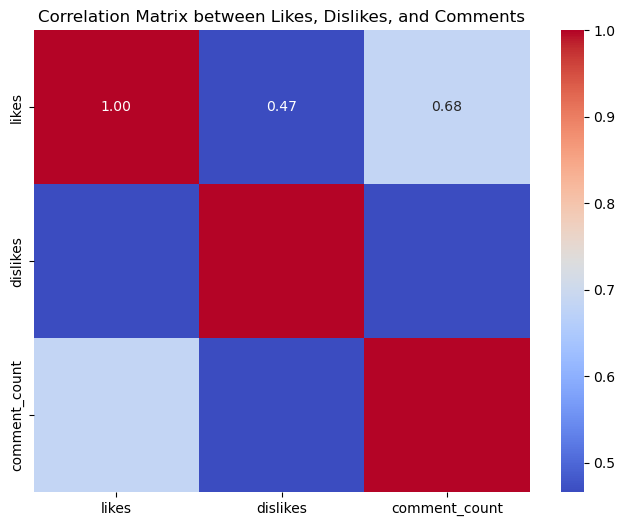

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the dataset
# Select the columns for likes, dislikes, and comments
likes_dislikes_comments = df[['likes', 'dislikes', 'comment_count']]

# Calculate the correlation matrix
correlation_matrix = likes_dislikes_comments.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix between Likes, Dislikes, and Comments')
plt.show()

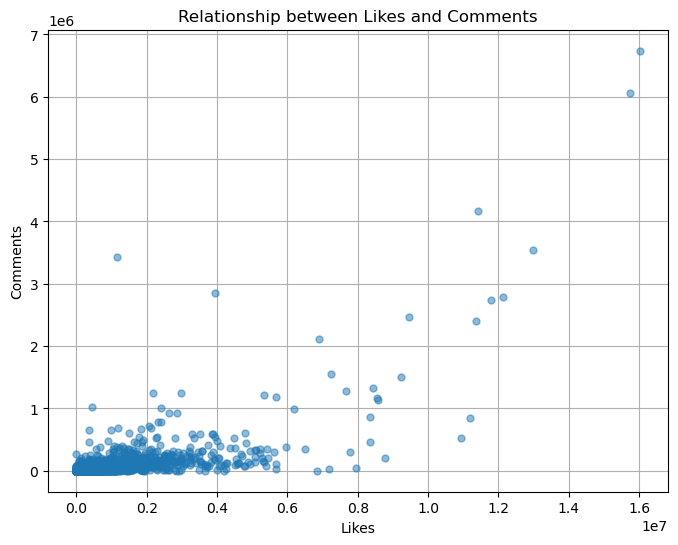

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the dataset
# Select the columns for likes and comments
likes_comments = df[['likes', 'comment_count']]

# Plot the relationship between likes and comments
plt.figure(figsize=(8, 6))
plt.plot(likes_comments['likes'], likes_comments['comment_count'], marker='o', linestyle='', markersize=5, alpha=0.5)
plt.title('Relationship between Likes and Comments')
plt.xlabel('Likes')
plt.ylabel('Comments')
plt.grid(True)
plt.show()


In [20]:
#  Do videos with more likes tend to have more views?

# Assuming df is your DataFrame containing the dataset
# Select the columns for likes and views
likes_views = df[['likes', 'view_count']]

# Calculate the correlation coefficient
correlation_coefficient = likes_views.corr().iloc[0, 1]

print("Correlation coefficient between likes and views:", correlation_coefficient)
print("This indicates a strong positive correlation between likes and view count.")

Correlation coefficient between likes and views: 0.6301570854051254
This indicates a strong positive correlation between likes and view count.


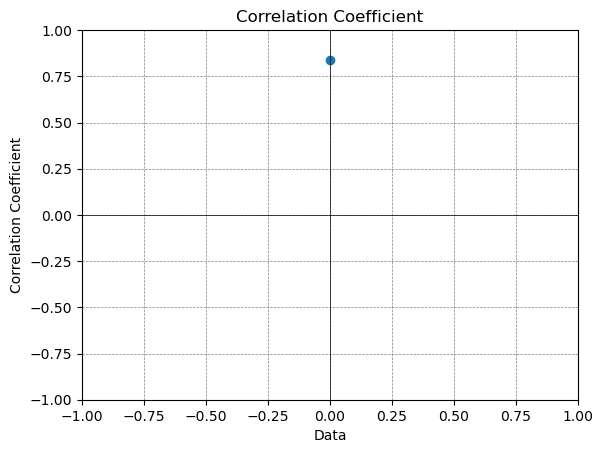

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Example correlation coefficient
correlation_coefficient = 0.8375824158274177

# Create a scatter plot to visualize the correlation coefficient
plt.scatter(0, correlation_coefficient)
plt.title('Correlation Coefficient')
plt.xlabel('Data')
plt.ylabel('Correlation Coefficient')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.show()

In [22]:
# How do likes and comments vary based on the time of publishing?


# Assuming df is your DataFrame containing the dataset
# Convert 'publishedAt' column to datetime format
df['publishedAt'] = pd.to_datetime(df['publishedAt'])

# Extract hour of the day from 'publishedAt'
df['hour_of_publishing'] = df['publishedAt'].dt.hour

# Group by hour of publishing and calculate average likes and comments
likes_comments_by_hour = df.groupby('hour_of_publishing')[['likes', 'comment_count']].mean()

likes_comments_by_hour

# print("Average likes and comments based on the time of publishing (hour of the day):")
# print(likes_comments_by_hour)

/var/folders/03/4fzp3dpd36s1z9wlxm8hzlv00000gn/T/ipykernel_76500/3539095290.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['publishedAt'] = pd.to_datetime(df['publishedAt'])
/var/folders/03/4fzp3dpd36s1z9wlxm8hzlv00000gn/T/ipykernel_76500/3539095290.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour_of_publishing'] = df['publishedAt'].dt.hour


,likes,comment_count
hour_of_publishing,,
0,115858.725922,7255.293244
1,92470.500943,6688.684475
2,71589.575591,8017.000000
3,159252.730860,25854.333070
4,236290.218972,23503.998670
5,152253.484751,11249.609149
6,116166.612903,9131.814516
7,138670.890909,7670.875325
8,221938.643182,24361.947727


/var/folders/03/4fzp3dpd36s1z9wlxm8hzlv00000gn/T/ipykernel_76500/742685545.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['publishedAt'] = pd.to_datetime(df['publishedAt'])
/var/folders/03/4fzp3dpd36s1z9wlxm8hzlv00000gn/T/ipykernel_76500/742685545.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour_of_publishing'] = df['publishedAt'].dt.hour


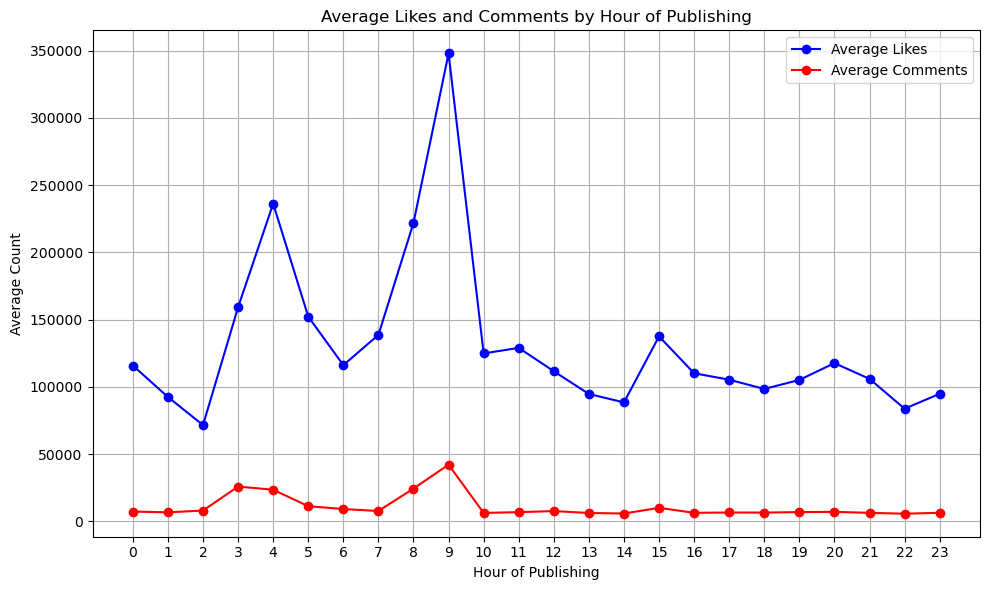

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the dataset
# Convert 'publishedAt' column to datetime format
df['publishedAt'] = pd.to_datetime(df['publishedAt'])

# Extract hour of the day from 'publishedAt'
df['hour_of_publishing'] = df['publishedAt'].dt.hour

# Group by hour of publishing and calculate average likes and comments
likes_comments_by_hour = df.groupby('hour_of_publishing')[['likes', 'comment_count']].mean()

# Plot
plt.figure(figsize=(10, 6))

# Likes
plt.plot(likes_comments_by_hour.index, likes_comments_by_hour['likes'], label='Average Likes', marker='o', color='b')

# Comments
plt.plot(likes_comments_by_hour.index, likes_comments_by_hour['comment_count'], label='Average Comments', marker='o', color='r')

# Title and labels
plt.title('Average Likes and Comments by Hour of Publishing')
plt.xlabel('Hour of Publishing')
plt.ylabel('Average Count')
plt.xticks(range(24))  # Assuming 24 hours in a day
plt.grid(True)

# Legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

In [24]:
# Audience Interaction:
# Are there any patterns in viewer engagement based on the video's category?
# How do comments vary depending on whether comments are enabled or disabled?
# Is there a relationship between the number of comments and the presence of specific tags?


In [25]:
#Do videos with longer descriptions tend to have higher engagement?

In [26]:
# Calculate description length in terms of number of characters
df['description_length'] = df['description'].str.len()
df['description_length']

/var/folders/03/4fzp3dpd36s1z9wlxm8hzlv00000gn/T/ipykernel_76500/2973486073.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['description_length'] = df['description'].str.len()


266187     100.0
152788    2279.0
56374     2264.0
3358      1929.0
73564      248.0
           ...  
126865     769.0
65504     2003.0
65528     1904.0
74492       79.0
80754      562.0
Name: description_length, Length: 48361, dtype: float64

In [63]:
# Remove rows with NaN values in the 'description_length' column
df = df.dropna(subset=['description_length'])

# Group videos into categories based on description length
# You can adjust the bins and labels according to your preference
df['description_category'] = pd.cut(df['description_length'], bins=[10, 1500, 3500, float('inf')],
                                     labels=['Short', 'Medium', 'Long'])
df['description_category']


266187     Short
152788    Medium
56374     Medium
3358      Medium
73564      Short
           ...  
126865     Short
65504     Medium
65528     Medium
74492      Short
80754      Short
Name: description_category, Length: 47454, dtype: category
Categories (3, object): ['Short' < 'Medium' < 'Long']

In [64]:
# Calculate average engagement metrics for each category
engagement_by_description = df.groupby('description_category').agg({
    'view_count': 'mean',
    'likes': 'mean',
    'dislikes': 'mean',
    'comment_count': 'mean'
}).reset_index()
engagement_by_description

/var/folders/03/4fzp3dpd36s1z9wlxm8hzlv00000gn/T/ipykernel_76500/3121741903.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  engagement_by_description = df.groupby('description_category').agg({


,description_category,view_count,likes,dislikes,comment_count
0,Short,2.428045e+06,109475.065753,1019.302392,7872.597915
1,Medium,3.356293e+06,144997.759210,1574.500893,13548.048225
2,Long,2.895585e+06,134368.031587,1262.694915,9128.699538


/opt/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


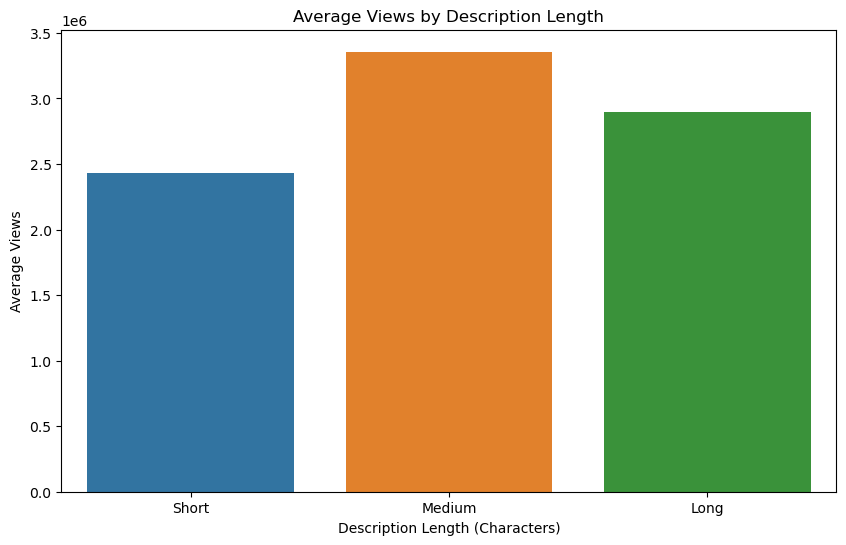

In [65]:
# Visualize relationship between description length and engagement metrics
plt.figure(figsize=(10, 6))
sns.barplot(x='description_category', y='view_count', data=engagement_by_description)
plt.title('Average Views by Description Length')
plt.xlabel('Description Length (Characters)')
plt.ylabel('Average Views')
plt.show()

In [66]:
# Filter the DataFrame to include only rows where view count is less than 0.5 * 1e8
filtered_df = df[df['view_count'] < 0.2 * 1e8]

# Display the filtered DataFrame
filtered_df


,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,time_to_trend,hour_of_publishing,description_length,description_category
204547,bef8QLNHubw,Bad Bunny - WHERE SHE GOES (Video Oficial),2023-05-19 00:00:08+00:00,UCmBA_wu8xGg1OfOkfW13Q0Q,Bad Bunny,10,2023-05-27 00:00:00+00:00,"[bad bunny, where she goes, where she goes bad...",19989097,867429,0,30957,https://i.ytimg.com/vi/bef8QLNHubw/default.jpg,False,False,Bad Bunny - WHERE SHE GOES (Video Oficial)http...,7 days 23:59:52,0,534.0,Short
17398,BInk1AoBHrY,"Live: Joe Biden, Kamala Harris Address The Nat...",2020-11-08 03:09:03+00:00,UCeY0bbntWzzVIaj2z3QigXg,NBC News,25,2020-11-08 00:00:00+00:00,"[nbc, news, news nbc, nbc live, live news, new...",19983734,202923,18225,3718,https://i.ytimg.com/vi/BInk1AoBHrY/default.jpg,False,False,President-elect Joe Biden and Vice President-e...,-1 days +20:50:57,3,1573.0,Medium
40177,60g72d4Nqss,BTS Performs 'Fix You' (Coldplay Cover) | MTV ...,2021-02-24 04:49:29+00:00,UCuwUfM8E79h2sqp34Fut6kw,MTV UK,24,2021-03-04 00:00:00+00:00,"[mtv uk, official, mtv international, MTV EMA,...",19983633,1777878,26411,200504,https://i.ytimg.com/vi/60g72d4Nqss/default.jpg,False,False,Musical guests BTS perform a stripped down cov...,7 days 19:10:31,4,681.0,Short
3347,G1mPnQM5hQ0,Giving JoJo Siwa A FULL MAKEOVER!,2020-08-21 19:00:06+00:00,UCucot-Zp428OwkyRm2I7v2Q,James Charles,24,2020-08-28 00:00:00+00:00,"[james, james charles, makeup artist, mua, cov...",19977004,1124214,43996,89584,https://i.ytimg.com/vi/G1mPnQM5hQ0/default.jpg,False,False,"HI SISTERS! In today's video, I give internet ...",6 days 04:59:54,19,1229.0,Short
77387,x_me3xsvDgk,Marvel Studios’ Eternals | Final Trailer,2021-08-19 07:00:05+00:00,UCvC4D8onUfXzvjTOM-dBfEA,Marvel Entertainment,24,2021-08-27 00:00:00+00:00,"[marvel, comics]",19950757,621680,11742,38208,https://i.ytimg.com/vi/x_me3xsvDgk/default.jpg,False,False,"When you love something, you protect it.Watch ...",7 days 16:59:55,7,807.0,Short
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126865,ZoPJVcHYlU0,Celebrating Route 66,2022-04-29 16:46:04+00:00,UCdq61m8s_48EhJ5OM_MCeGw,GoogleDoodles,1,2022-05-04 00:00:00+00:00,[[None]],0,0,0,0,https://i.ytimg.com/vi/ZoPJVcHYlU0/default.jpg,True,True,Today’s video Doodle takes you on the ultimate...,4 days 07:13:56,16,769.0,Short
65504,ifJYb2An7wE,Gay And Not Proud - Daniel Howell | YouTube Pr...,2021-06-25 21:04:38+00:00,UCGjylN-4QCpn8XJ1uY-UOgA,Daniel Howell,24,2021-06-29 00:00:00+00:00,"[Pride, Pride 2021, YouTube Pride, YouTube Pri...",0,0,0,1739,https://i.ytimg.com/vi/ifJYb2An7wE/default.jpg,False,True,"On June 25, join Daniel Howell as he celebrate...",3 days 02:55:22,21,2003.0,Medium
65528,kmk5vciFbek,Demi Lovato performs their greatest hits this ...,2021-06-26 00:07:19+00:00,UCZkURf9tDolFOeuw_4RD7XQ,Demi Lovato,24,2021-06-29 00:00:00+00:00,"[Pride, Pride 2021, YouTube Pride, YouTube Pri...",0,0,0,147,https://i.ytimg.com/vi/kmk5vciFbek/default.jpg,False,True,"On June 25, celebrate Pride 2021 with Demi Lov...",2 days 23:52:41,0,1904.0,Medium
74492,Hb3rmh-_FMw,Introducing the shorter side of YouTube,2021-08-10 15:04:25+00:00,UCBR8-60-B28hp2BmDPdntcQ,YouTube,27,2021-08-13 00:00:00+00:00,[[None]],0,22030,1604,0,https://i.ytimg.com/vi/Hb3rmh-_FMw/default.jpg,True,False,*****EPILEPSY WARNING ********Watch and create...,2 days 08:55:35,15,79.0,Short


/opt/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


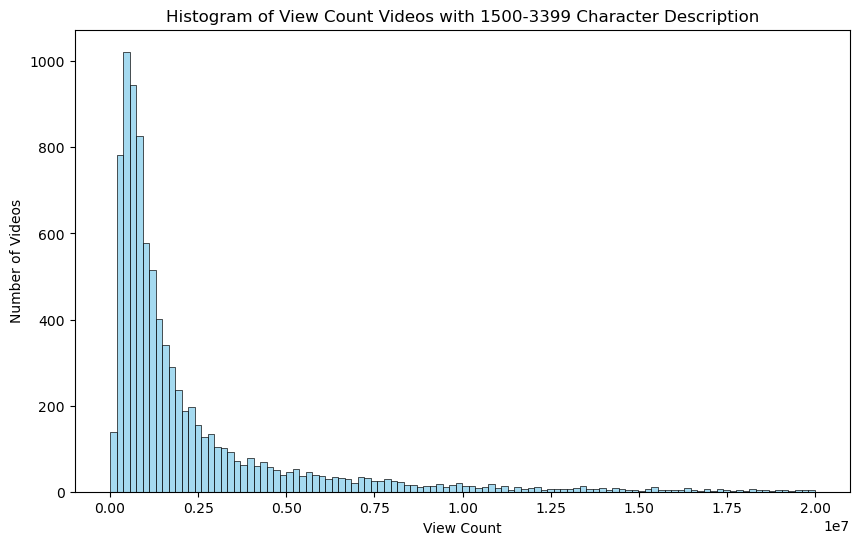

In [67]:
from matplotlib.ticker import FuncFormatter

# Function to format tick labels as integers
def format_ticks(x, pos):
    return '{:,.0f}'.format(x)

# Filter the DataFrame to include only rows where description category is 'Medium'
medium_bin_filtered_df = filtered_df[filtered_df['description_category'] == 'Medium']

# Create a histogram of view count for the medium bin
plt.figure(figsize=(10, 6))
sns.histplot(medium_bin_filtered_df['view_count'], color='skyblue')
plt.title('Histogram of View Count Videos with 1500-3399 Character Description')
plt.xlabel('View Count')
plt.ylabel('Number of Videos')
plt.show()


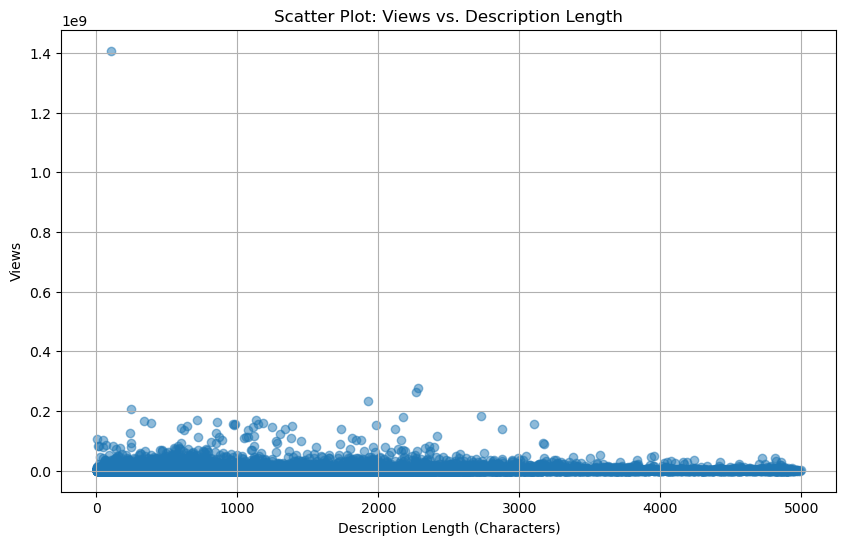

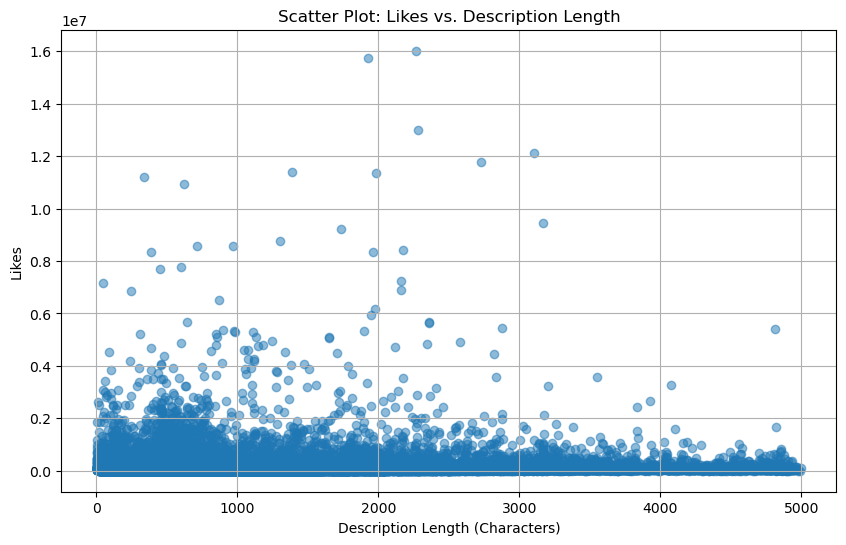

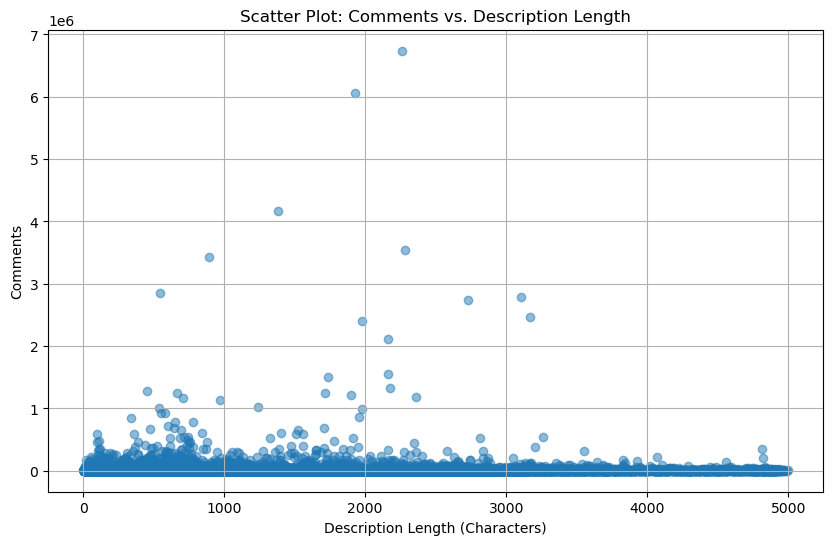

In [68]:
# Scatter plot for views vs. description length
plt.figure(figsize=(10, 6))
plt.scatter(df['description_length'], df['view_count'], alpha=0.5)
plt.title('Scatter Plot: Views vs. Description Length')
plt.xlabel('Description Length (Characters)')
plt.ylabel('Views')
plt.grid(True)
plt.show()

# Scatter plot for likes vs. description length
plt.figure(figsize=(10, 6))
plt.scatter(df['description_length'], df['likes'], alpha=0.5)
plt.title('Scatter Plot: Likes vs. Description Length')
plt.xlabel('Description Length (Characters)')
plt.ylabel('Likes')
plt.grid(True)
plt.show()

# Scatter plot for comments vs. description length
plt.figure(figsize=(10, 6))
plt.scatter(df['description_length'], df['comment_count'], alpha=0.5)
plt.title('Scatter Plot: Comments vs. Description Length')
plt.xlabel('Description Length (Characters)')
plt.ylabel('Comments')
plt.grid(True)
plt.show()

/opt/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


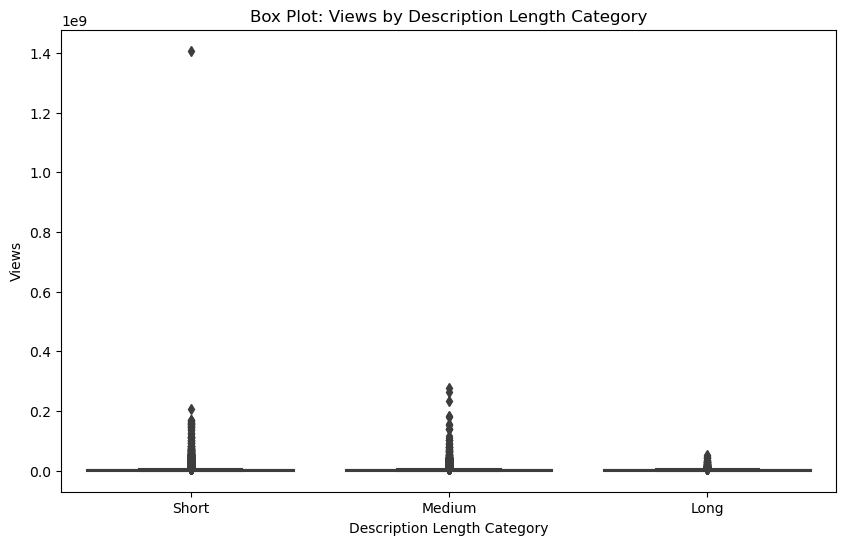

/opt/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


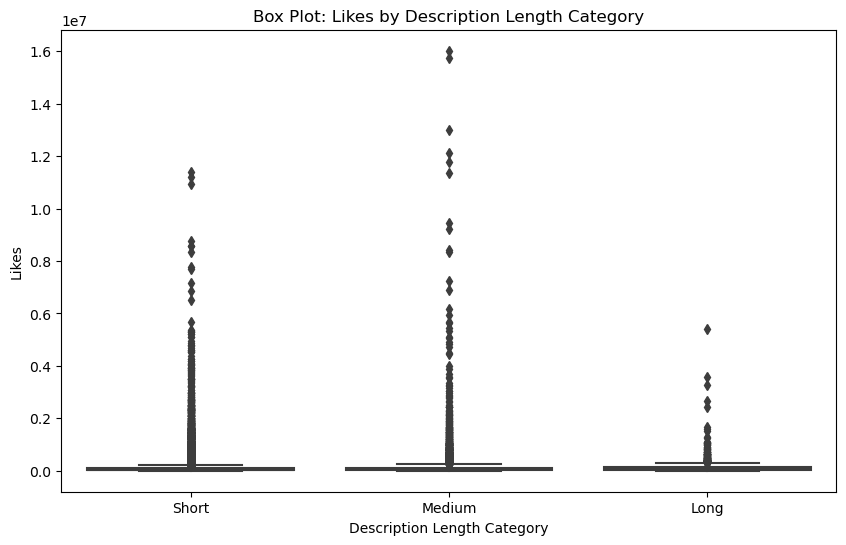

/opt/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


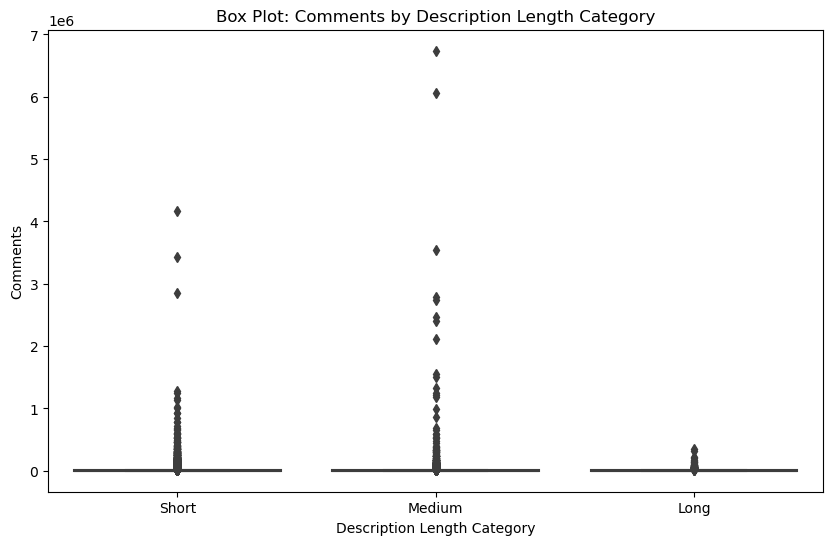

In [69]:
# Box plot for views by description length category
plt.figure(figsize=(10, 6))
sns.boxplot(x='description_category', y='view_count', data=df)
plt.title('Box Plot: Views by Description Length Category')
plt.xlabel('Description Length Category')
plt.ylabel('Views')
plt.show()

# Box plot for likes by description length category
plt.figure(figsize=(10, 6))
sns.boxplot(x='description_category', y='likes', data=df)
plt.title('Box Plot: Likes by Description Length Category')
plt.xlabel('Description Length Category')
plt.ylabel('Likes')
plt.show()

# Box plot for comments by description length category
plt.figure(figsize=(10, 6))
sns.boxplot(x='description_category', y='comment_count', data=df)
plt.title('Box Plot: Comments by Description Length Category')
plt.xlabel('Description Length Category')
plt.ylabel('Comments')
plt.show()

In [36]:
# Group videos by category and calculate average number of comments
comments_by_category = df.groupby('categoryId')['comment_count'].mean().reset_index()
comments_by_category

,categoryId,comment_count
0,1,7296.931223
1,2,3556.570010
2,10,25106.757179
3,15,3442.384236
4,17,3201.746396
5,19,2825.710963
6,20,5885.792667
7,22,6239.132817
8,23,5899.862069
9,24,8529.602377


In [41]:
import numpy as np

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df['view_count'].quantile(0.25)
Q3 = df['view_count'].quantile(0.75)

# Interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['view_count'] < lower_bound) | (df['view_count'] > upper_bound)]

# Remove outliers from the DataFrame
df_filtered = df[(df['view_count'] >= lower_bound) & (df['view_count'] <= upper_bound)]

# Print the outliers
print("Outliers:")
print(outliers)

# Print the filtered DataFrame without outliers
print("\nDataFrame without outliers:")
print(df_filtered)

Outliers:
           video_id                                              title  \
266187  cc2-4ci4G84                       Discord Loot Boxes are here.   
152788  gQlMMD8auMs                       BLACKPINK - ‘Pink Venom’ M/V   
56374   WMweEpGlu_U                   BTS (방탄소년단) 'Butter' Official MV   
3358    gdZLi9oWNZg                 BTS (방탄소년단) 'Dynamite' Official MV   
73564   hdmx71UjBXs                Turn into orbeez - Tutorial #Shorts   
...             ...                                                ...   
35390   6Zbhvaac68Y                                 Spot's Got an Arm!   
69190   KISlIJDOMJU                   HIDE & SEEK ON KSI’s PRIVATE JET   
157977  4E2EbGoXlPQ  David Blaine Does Magic While Eating Spicy Win...   
66768   VEnNwaM_acw                    *NEW* DODGEBALL Mod in Among Us   
252784  Vb0dG-2huJE                  A Guided Tour of Apple Vision Pro   

                     publishedAt                 channelId     channelTitle  \
266187 2024-04-01 17:4

In [42]:
# Calculate Pearson correlation coefficient between description length and views
correlation = df['description_length'].corr(df['view_count'])

print("Pearson correlation coefficient between description length and views:", correlation)


Pearson correlation coefficient between description length and views: 0.033531003548923924


/opt/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x600 with 0 Axes>

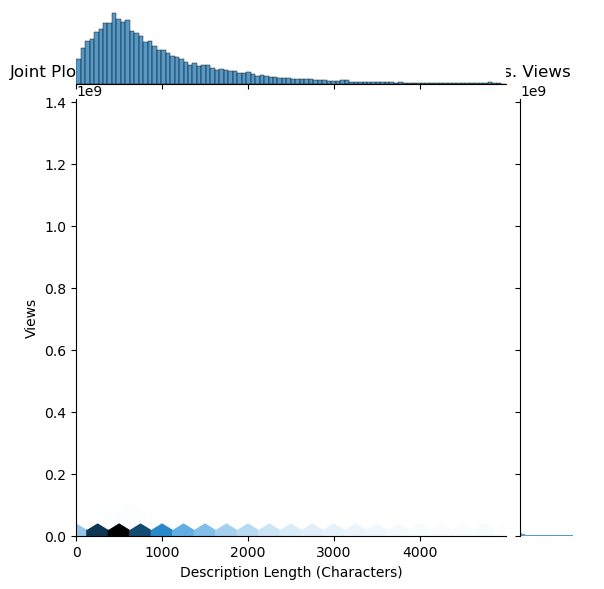

In [44]:
# Create a joint plot with hexbin representation
plt.figure(figsize=(10, 6))
sns.jointplot(x='description_length', y='view_count', data=df, kind='hex', gridsize=20)
plt.title('Joint Plot with Hexbin Representation: Description Length vs. Views')
plt.xlabel('Description Length (Characters)')
plt.ylabel('Views')
plt.xlim(0, df['description_length'].max())  # Adjust x-axis limit to the maximum description length
plt.ylim(0, df['view_count'].max())  # Adjust y-axis limit to the maximum view count
plt.show()

/var/folders/03/4fzp3dpd36s1z9wlxm8hzlv00000gn/T/ipykernel_76500/2039698024.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  views_by_description_length = df.groupby(bins)['view_count'].mean()


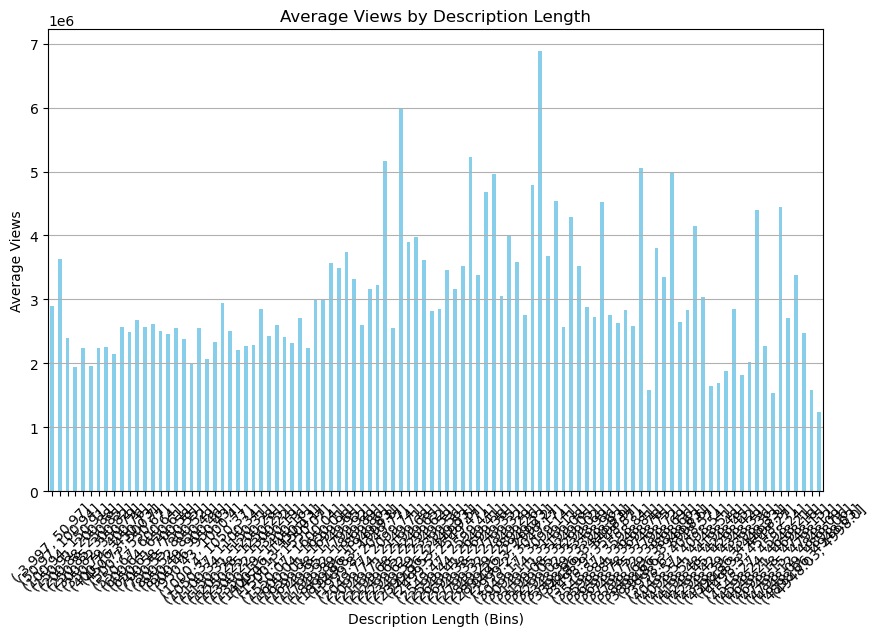

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the bins for description length
bins = pd.cut(df['description_length'], bins=100)  # Adjust the number of bins as needed

# Calculate the average views within each bin
views_by_description_length = df.groupby(bins)['view_count'].mean()

# Plot the bar graph
plt.figure(figsize=(10, 6))
views_by_description_length.plot(kind='bar', color='skyblue')
plt.title('Average Views by Description Length')
plt.xlabel('Description Length (Bins)')
plt.ylabel('Average Views')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


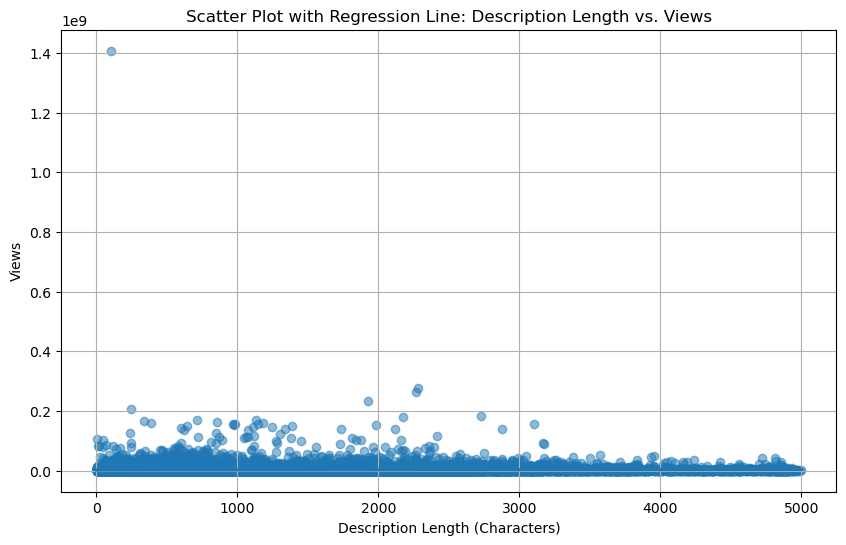

In [39]:
# Create a scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='description_length', y='view_count', data=df, scatter_kws={'alpha':0.5})
plt.title('Scatter Plot with Regression Line: Description Length vs. Views')
plt.xlabel('Description Length (Characters)')
plt.ylabel('Views')
plt.grid(True)
plt.show()

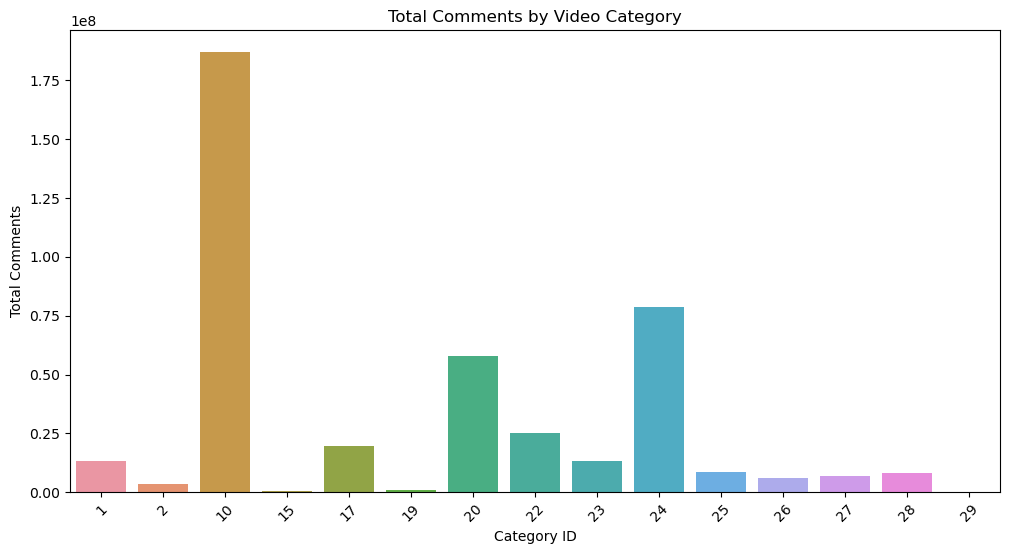

In [30]:
# Group videos by category and calculate total comments
comments_by_category = df.groupby('categoryId')['comment_count'].sum().reset_index()

# Sort the data by total comments
comments_by_category = comments_by_category.sort_values(by='comment_count', ascending=False)

# Visualize the results
plt.figure(figsize=(12, 6))
sns.barplot(x='categoryId', y='comment_count', data=comments_by_category)
plt.title('Total Comments by Video Category')
plt.xlabel('Category ID')
plt.ylabel('Total Comments')
plt.xticks(rotation=45)
plt.show()

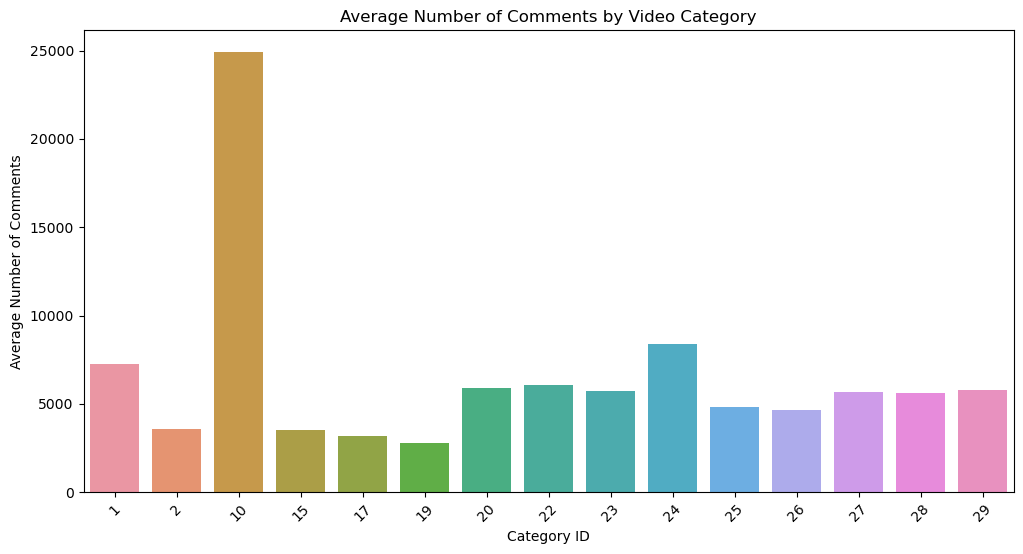

In [31]:
# Group videos by category and calculate average number of comments
comments_by_category = df.groupby('categoryId')['comment_count'].mean().reset_index()

# Sort the data by average number of comments
comments_by_category = comments_by_category.sort_values(by='comment_count', ascending=False)

# Visualize the results
plt.figure(figsize=(12, 6))
sns.barplot(x='categoryId', y='comment_count', data=comments_by_category)
plt.title('Average Number of Comments by Video Category')
plt.xlabel('Category ID')
plt.ylabel('Average Number of Comments')
plt.xticks(rotation=45)
plt.show()

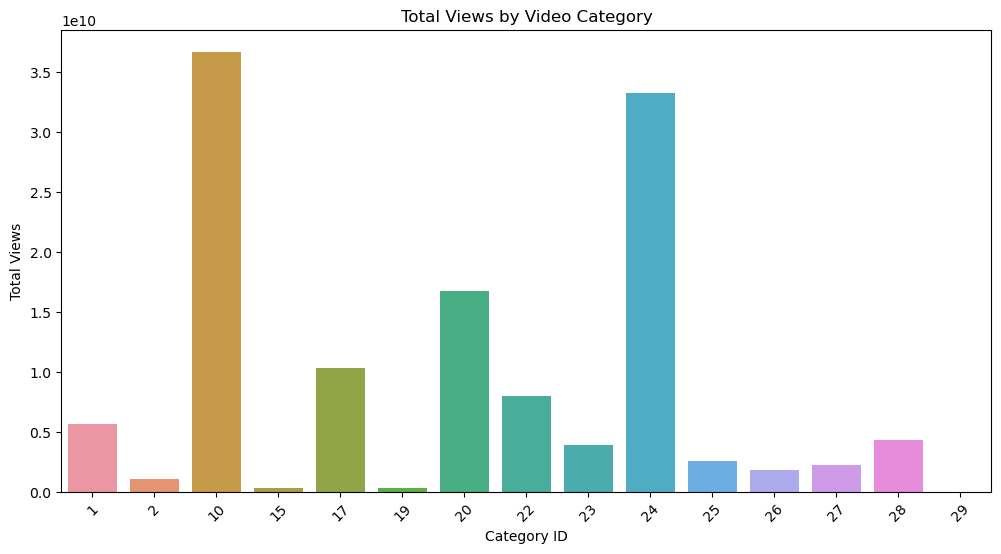

In [32]:
# Group videos by category and calculate total views
views_by_category = df.groupby('categoryId')['view_count'].sum().reset_index()

# Sort the data by total views
views_by_category = views_by_category.sort_values(by='view_count', ascending=False)

# Visualize the results
plt.figure(figsize=(12, 6))
sns.barplot(x='categoryId', y='view_count', data=views_by_category)
plt.title('Total Views by Video Category')
plt.xlabel('Category ID')
plt.ylabel('Total Views')
plt.xticks(rotation=45)
plt.show()

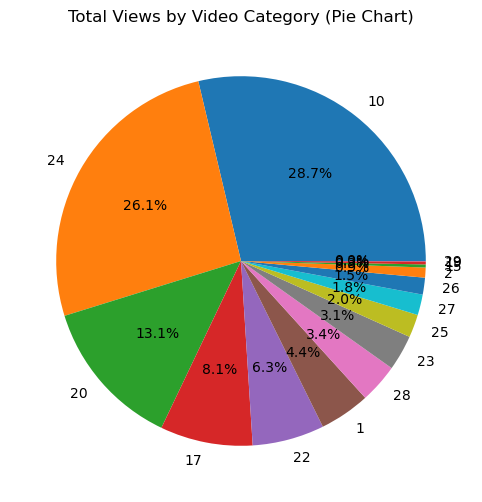

In [33]:
plt.figure(figsize=(10, 6))
plt.pie(views_by_category['view_count'], labels=views_by_category['categoryId'], autopct='%1.1f%%')
plt.title('Total Views by Video Category (Pie Chart)')
plt.show()

/opt/miniconda3/envs/myenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/miniconda3/envs/myenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/miniconda3/envs/myenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


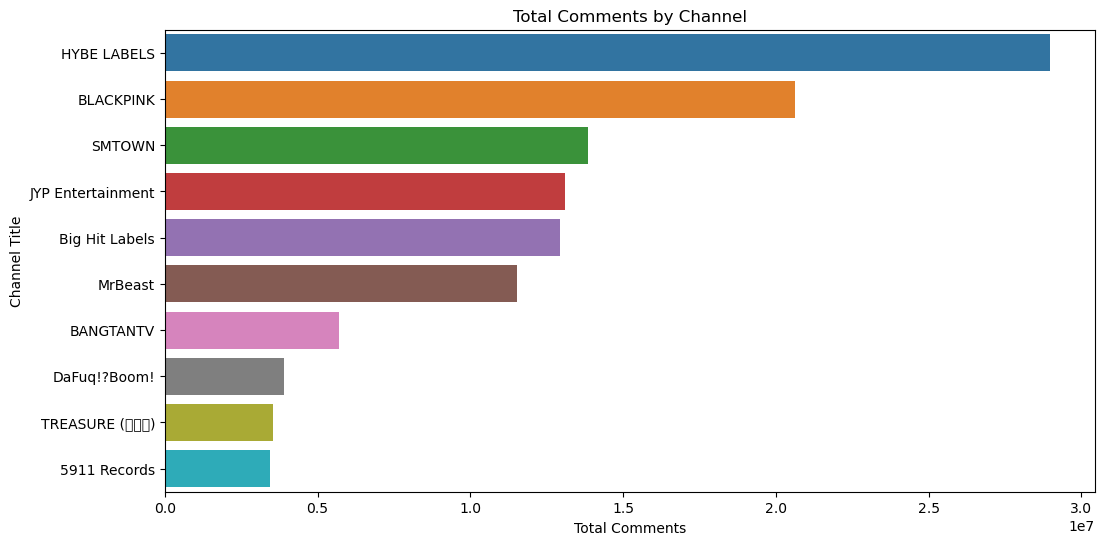

In [34]:
# Group videos by channel and calculate total comments
comments_by_channel = df.groupby('channelTitle')['comment_count'].sum().reset_index()

# Sort the data by total comments
comments_by_channel = comments_by_channel.sort_values(by='comment_count', ascending=False)

# Visualize the results
plt.figure(figsize=(12, 6))
sns.barplot(x='comment_count', y='channelTitle', data=comments_by_channel.head(10))  # Plot only top 10 channels
plt.title('Total Comments by Channel')
plt.xlabel('Total Comments')
plt.ylabel('Channel Title')
plt.show()

/opt/miniconda3/envs/myenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/miniconda3/envs/myenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/miniconda3/envs/myenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


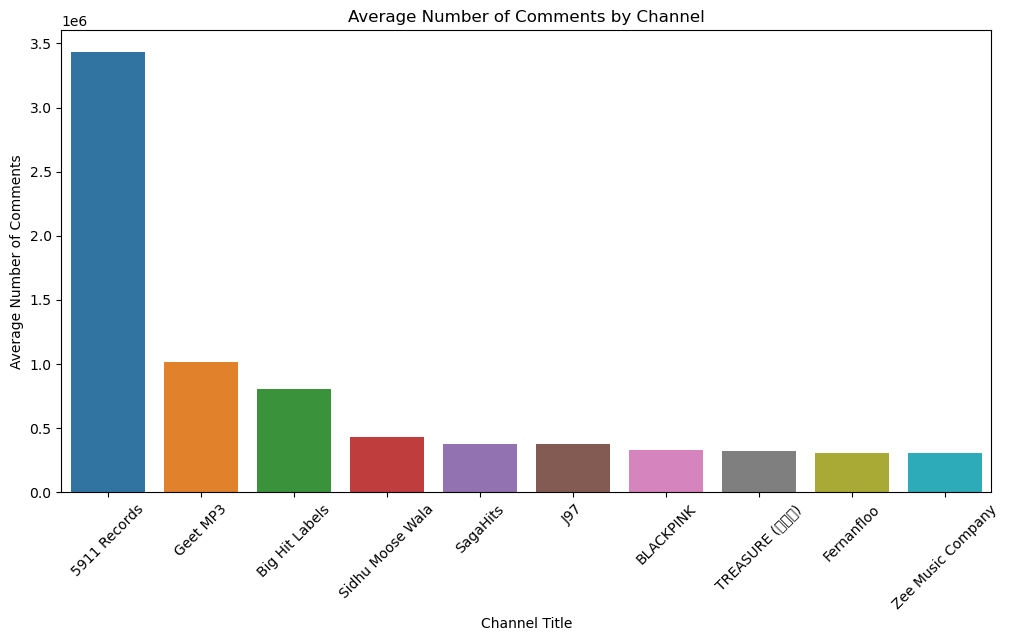

In [35]:
# Group videos by channel and calculate average number of comments
comments_by_channel = df.groupby('channelTitle')['comment_count'].mean().reset_index()

# Sort the data by average number of comments
comments_by_channel = comments_by_channel.sort_values(by='comment_count', ascending=False)

# Visualize the results
plt.figure(figsize=(12, 6))
sns.barplot(x='channelTitle', y='comment_count', data=comments_by_channel.head(10))  # Plot only top 10 channels
plt.title('Average Number of Comments by Channel')
plt.xlabel('Channel Title')
plt.ylabel('Average Number of Comments')
plt.xticks(rotation=45)
plt.show()


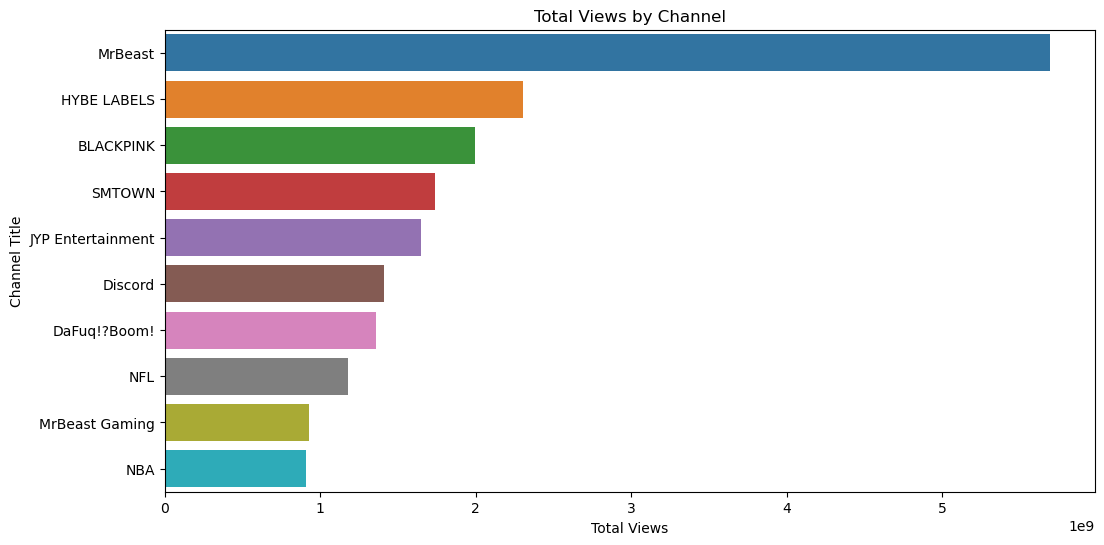

In [36]:
# Group videos by channel and calculate total views
views_by_channel = df.groupby('channelTitle')['view_count'].sum().reset_index()

# Sort the data by total views
views_by_channel = views_by_channel.sort_values(by='view_count', ascending=False)

# Visualize the results
plt.figure(figsize=(12, 6))
sns.barplot(x='view_count', y='channelTitle', data=views_by_channel.head(10))  # Plot only top 10 channels
plt.title('Total Views by Channel')
plt.xlabel('Total Views')
plt.ylabel('Channel Title')
plt.show()